# Classifying handwritten digits using artificial neural networks

In [ ]:
#pip install tensorflow

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import models, datasets, layers, optimizers

In [2]:
# https://keras.io/api/datasets/

(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [6]:
X_train.shape

(50000, 28, 28)

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


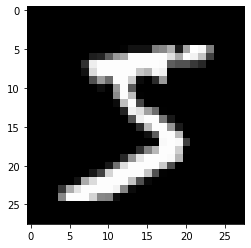

In [9]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0]);

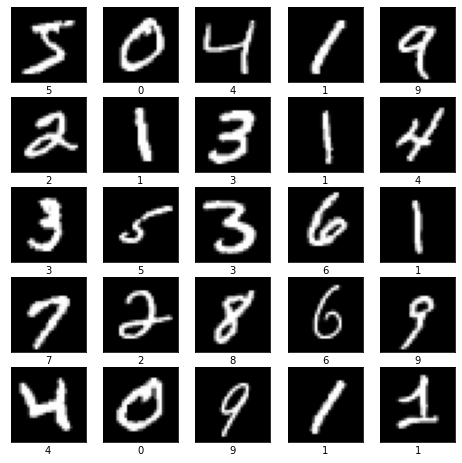

In [10]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

In [11]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

In [12]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# Use a flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 1s 766us/step - loss: 0.5046 - accuracy: 0.8688
Epoch 2/5
1563/1563 [==============================] - 1s 760us/step - loss: 0.3166 - accuracy: 0.9124
Epoch 3/5
1563/1563 [==============================] - 1s 746us/step - loss: 0.2922 - accuracy: 0.9182
Epoch 4/5
1563/1563 [==============================] - 1s 747us/step - loss: 0.2813 - accuracy: 0.9208
Epoch 5/5
1563/1563 [==============================] - 1s 749us/step - loss: 0.2738 - accuracy: 0.9239


In [17]:
info = ann1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 1s 917us/step - loss: 0.2680 - accuracy: 0.9248 - val_loss: 0.2569 - val_accuracy: 0.9289
Epoch 2/10
1563/1563 [==============================] - 1s 834us/step - loss: 0.2641 - accuracy: 0.9269 - val_loss: 0.2622 - val_accuracy: 0.9267
Epoch 3/10
1563/1563 [==============================] - 1s 946us/step - loss: 0.2605 - accuracy: 0.9276 - val_loss: 0.2544 - val_accuracy: 0.9309
Epoch 4/10
1563/1563 [==============================] - 1s 939us/step - loss: 0.2586 - accuracy: 0.9273 - val_loss: 0.2515 - val_accuracy: 0.9324
Epoch 5/10
1563/1563 [==============================] - 1s 846us/step - loss: 0.2554 - accuracy: 0.9288 - val_loss: 0.2539 - val_accuracy: 0.9320
Epoch 6/10
1563/1563 [==============================] - 1s 869us/step - loss: 0.2539 - accuracy: 0.9295 - val_loss: 0.2509 - val_accuracy: 0.9310
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2513 - accuracy: 0.9299 - val_loss: 0.2562 - v

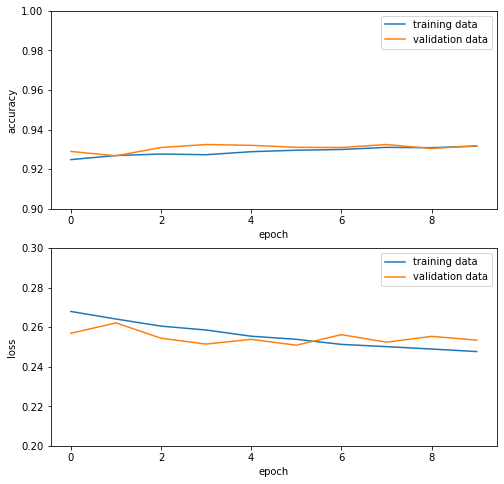

In [18]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.90,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.2,0.3])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [19]:
ann1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 658us/step - loss: 0.2668 - accuracy: 0.9271


[0.26675042510032654, 0.9271000027656555]

In [20]:
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([1.0739660e-07, 2.8930206e-13, 7.4137165e-07, 3.5810773e-03,
       1.2772992e-07, 1.3848355e-05, 6.5810150e-13, 9.9618345e-01,
       5.6080730e-06, 2.1507425e-04], dtype=float32)

In [21]:
np.argmax(y_pred[0])

7

7


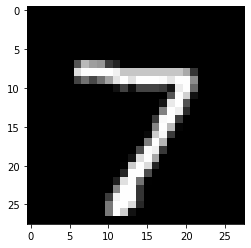

In [22]:
plt.imshow(X_test[0], cmap="gray")
print(y_test[0]);

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [24]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[ 958,    0,    0,    2,    1,    7,    8,    3,    1,    0],
       [   0, 1114,    4,    1,    0,    1,    4,    2,    9,    0],
       [   6,    8,  936,   17,    8,    4,   14,   11,   25,    3],
       [   3,    0,   18,  924,    1,   24,    2,   12,   19,    7],
       [   1,    1,    5,    2,  913,    0,   11,    8,   10,   31],
       [   9,    2,    3,   33,    9,  787,   12,    7,   25,    5],
       [  12,    3,    5,    2,    6,   16,  911,    1,    2,    0],
       [   1,    6,   21,    7,    5,    1,    0,  962,    2,   23],
       [   7,    8,    9,   23,    9,   32,    9,   12,  856,    9],
       [  11,    7,    1,   11,   28,    8,    0,   30,    3,  910]],
      dtype=int64)

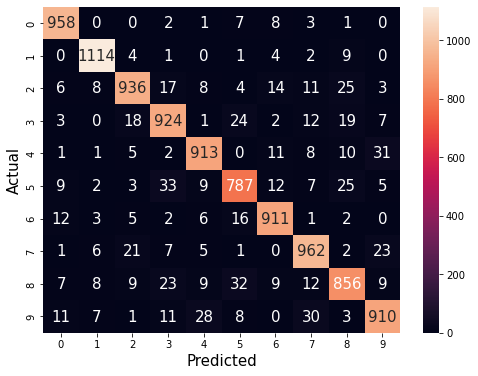

In [25]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.91      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.89      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.92      0.94      0.93      1028
           8       0.90      0.88      0.89       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [27]:
# Use one hidden layer

ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann2.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2774 - accuracy: 0.9200
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1257 - accuracy: 0.9627
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0862 - accuracy: 0.9740
Epoch 4/5
1563/1563 [==============================] - 2s 987us/step - loss: 0.0651 - accuracy: 0.9806
Epoch 5/5
1563/1563 [==============================] - 2s 971us/step - loss: 0.0496 - accuracy: 0.9854


In [28]:
ann2.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 750us/step - loss: 0.0875 - accuracy: 0.9746


[0.08746283501386642, 0.9746000170707703]

In [29]:
ann2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Use dropout and batch normalization

from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 1ms/step - loss: 0.3043 - accuracy: 0.9066
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1640 - accuracy: 0.9498
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1335 - accuracy: 0.9591
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1132 - accuracy: 0.9648
Epoch 5/5
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1026 - accuracy: 0.9672


In [31]:
ann3.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 928us/step - loss: 0.0845 - accuracy: 0.9764


[0.0845225602388382, 0.9764000177383423]

In [32]:
ann3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
______________________________________________